In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
path_wam = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hwam.xvg"
path_wch = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hwch.xvg"
path_wop = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hwop.xvg"
path_wc36 = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hwc36m.xvg"
path_mam = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hmam.xvg"
path_mch = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hmch.xvg"
path_mop = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hmop.xvg"
path_mc36 = r"C:\Users\vaibh\Documents\Analysis\CodeFiles\Hb_helical\hb_hmc36m.xvg"

In [12]:
ff = ['wam', 'wch', 'wop', 'wc36', 'mam', 'mch', 'mop', 'mc36']

data=[]

In [13]:
st = "@ s1 legend"
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as file:
        lines = file.readlines()
    
    flag = False
    tmp = []
    for x in lines:
        if not flag:
            if x.strip().startswith(st):
                flag=True
            continue
        tmp.append(float(x.split()[1]))
    
    data.append(tmp)
    del tmp

In [14]:
col = list(range(0, int(1e+05) +1))

In [15]:
df = pd.DataFrame(data=data, columns=col, index=ff)
df = df.transpose()

df.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
0,12.0,20.0,20.0,19.0,17.0,20.0,19.0,12.0
1,12.0,17.0,20.0,17.0,14.0,19.0,20.0,14.0
2,13.0,19.0,19.0,15.0,16.0,19.0,17.0,14.0
3,13.0,20.0,20.0,18.0,18.0,17.0,14.0,13.0
4,14.0,17.0,18.0,17.0,19.0,19.0,17.0,16.0


In [16]:
idx = list(range(0, int(1e+06)+1, 10))
len(idx)
# df.shape

100001

In [17]:
df.index = idx
df.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
0,12.0,20.0,20.0,19.0,17.0,20.0,19.0,12.0
10,12.0,17.0,20.0,17.0,14.0,19.0,20.0,14.0
20,13.0,19.0,19.0,15.0,16.0,19.0,17.0,14.0
30,13.0,20.0,20.0,18.0,18.0,17.0,14.0,13.0
40,14.0,17.0,18.0,17.0,19.0,19.0,17.0,16.0


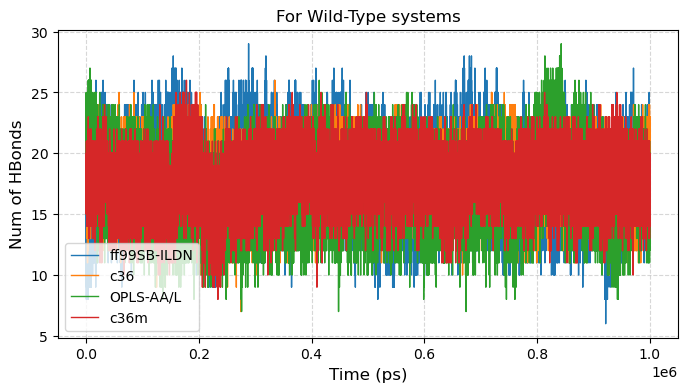

In [26]:
plt.figure(figsize=(8, 4))

# Plotting the lines
lines = plt.plot(df[['wam', 'wch', 'wop', 'wc36']], linewidth=1.0)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('Num of HBonds', fontsize=12)
# plt.ylim(0, 10)
plt.title('For Wild-Type systems')

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=10)

# Saving and showing plot
plt.savefig('hb_wt.png', dpi=600)
plt.show()

In [44]:
df.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
0,12.0,20.0,20.0,19.0,17.0,20.0,19.0,12.0
10,12.0,17.0,20.0,17.0,14.0,19.0,20.0,14.0
20,13.0,19.0,19.0,15.0,16.0,19.0,17.0,14.0
30,13.0,20.0,20.0,18.0,18.0,17.0,14.0,13.0
40,14.0,17.0,18.0,17.0,19.0,19.0,17.0,16.0


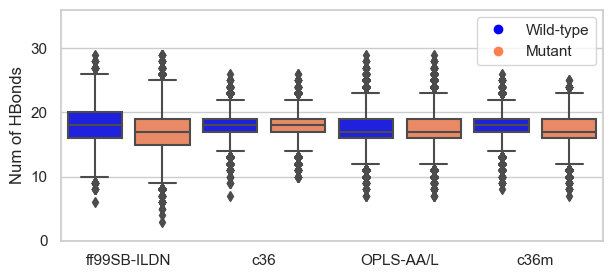

In [53]:
plt.figure(figsize=(7, 3))
sns.set_theme(style="whitegrid")
palette = {'wam': 'blue', 'wch': 'blue', 'wop': 'blue', 'wc36': 'blue',
           'mam': 'coral', 'mch': 'coral', 'mop': 'coral', 'mc36': 'coral'}
# Boxplot
sns.boxplot(data=df[['wam', 'mam', 'wch', 'mch', 'wop', 'mop', 'wc36', 'mc36']], palette=palette)
plt.xticks([0.5, 2.5, 4.5, 6.5], ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m'])
plt.ylim(0, 36)

plt.ylabel('Num of HBonds')

# Create custom legend labels
legend_labels = {'Wild-type': 'blue', 'Mutant': 'coral'}
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in legend_labels.items()]

# Add legend
plt.legend(handles=custom_legend)

plt.savefig('hbond_boxplot.jpg', dpi=300)
plt.show()

#### RUNNING AVG

In [18]:
window_size = 250
df_avg = df.rolling(window=window_size).mean()
df_avg.dropna(inplace=True)
# Saving Dataframes to exel files
# df_wt_avg.to_excel("rmsd_wtAvg.xlsx", index=True)
df_avg.shape

(99752, 8)

In [19]:
df_avg.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
2490,14.332,17.908,20.048,17.820,16.188,17.676,15.644,16.544
2500,14.336,17.904,20.056,17.812,16.164,17.648,15.616,16.560
2510,14.344,17.916,20.064,17.808,16.160,17.628,15.612,16.568
2520,14.348,17.900,20.064,17.816,16.152,17.612,15.600,16.580
2530,14.356,17.888,20.072,17.812,16.144,17.616,15.600,16.596


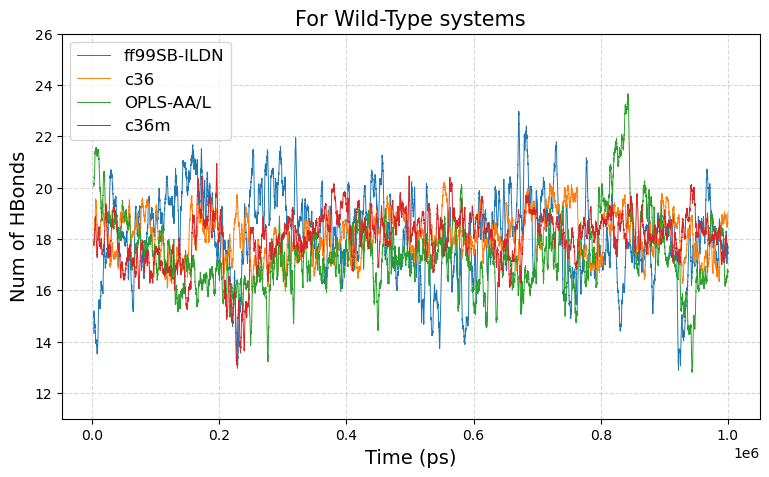

In [29]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['wam', 'wch', 'wop', 'wc36']], linewidth=0.7)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Num of HBonds', fontsize=14)
plt.ylim(11, 26)
plt.title('For Wild-Type systems', fontsize=15)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=12)

# Saving and showing plot
plt.savefig('hb_wt.png', dpi=600)
plt.show()

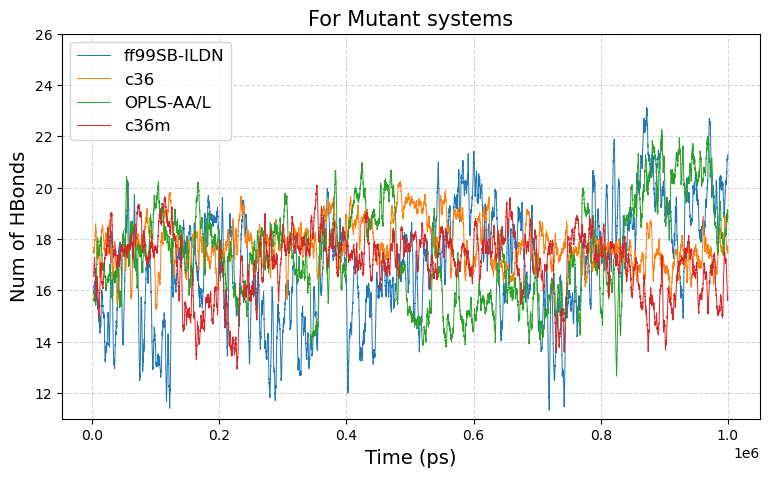

In [30]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['mam', 'mch', 'mop', 'mc36']], linewidth=0.7)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Num of HBonds', fontsize=14)
plt.ylim(11, 26)
plt.title('For Mutant systems', fontsize=15)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, fontsize=12)

# Saving and showing plot
plt.savefig('hb_mt.png', dpi=600)
plt.show()